In [5]:
import yt
import matplotlib
import matplotlib.pyplot as plt
import shutil
import numpy as np
import matplotlib.style
from mpl_toolkits.axes_grid1 import AxesGrid

def Load(path):
    p = '{}/'.format(path)
    shutil.copy2('extra/yt/WarpXHeader', p)
    shutil.copy2('extra/yt/warpx_job_info', p)
    return yt.load(p)


n_cycles = 11

base_names = ['build/BK19_Pseudo_Incompressible-pre-step', 
              'build/BK19_Pseudo_Incompressible-advect',
              'build/BK19_Pseudo_Incompressible-advect-backward',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward-advect',
              'build/BK19_Pseudo_Incompressible-advect-backward-forward-advect-backward']
timeseries = ['plt{:09d}'.format(i) for i in range(0, n_cycles)]
    
paths = ['{}/{}'.format(base_names[0], timeserie) for timeserie in timeseries]

def PlotVariables(path):
    ds = Load(path)
    variables = ['Density', 'PTdensity', 'Velocity_0', 'Velocity_1']
    fig = plt.figure()
    fig.suptitle(path)
    grid = AxesGrid(fig, (0, 0, 1.0, 1.0),
                    nrows_ncols = (3, 2), 
                    axes_pad = 1.0,
                    cbar_mode = 'each',
                    cbar_location = 'right')
    p = yt.SlicePlot(ds, 'z', variables, origin='native')
    for i, var in enumerate(variables):
        p.set_log(var, False)
        p.set_cmap(var, 'Blue-Red')
        plot = p.plots[var]
        plot.figure = fig
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]

    ds_Pv = Load(path.replace('plt', 'Pv_plt'))
    p2 = yt.SlicePlot(ds_Pv, 'z', ['Pv_0', 'Pv_1'], origin='native')
    p2.set_log('Pv_0', False)
    p2.set_cmap('Pv_0', 'Blue-Red')
    plot = p2.plots['Pv_0']
    plot.figure = fig
    plot.axes = grid[4].axes
    plot.cax = grid.cbar_axes[4]

    p2.set_log('Pv_1', False)
    p2.set_cmap('Pv_1', 'Blue-Red')
    plot = p2.plots['Pv_1']
    plot.figure = fig
    plot.axes = grid[5].axes
    plot.cax = grid.cbar_axes[5]
    
    p._setup_plots()
    p2._setup_plots()
    
    g = ds.index.grids[0]
    pi = np.squeeze(np.array(g["pi"]))

    x_nd = np.linspace(g.LeftEdge[0], g.RightEdge[0], g.shape[0]+1)
    y_nd = np.linspace(g.LeftEdge[1], g.RightEdge[1], g.shape[1]+1)

    a_nd = np.zeros(g.shape[:2]+1)
    a_nd[:-1,:-1] = pi[:,:,0]
    a_nd[:-1,-1] = pi[:,-1,1]
    a_nd[-1,:-1] = pi[-1,:,2]
    a_nd[-1,-1] = pi[-1,-1,3]

    fig2 = plt.figure()
    fig2.suptitle('Pi')
    plt.imshow(a_nd.transpose(), interpolation='none', origin='lower')
    plt.colorbar()

yt : [INFO     ] 2020-01-16 13:31:48,210 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-01-16 13:31:48,212 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:31:48,215 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:31:48,217 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:31:49,295 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:31:49,296 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:31:49,300 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:31:49,305 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:31:49,312 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:31:49,337 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:31:49,370 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 2020-01-16 13:31:

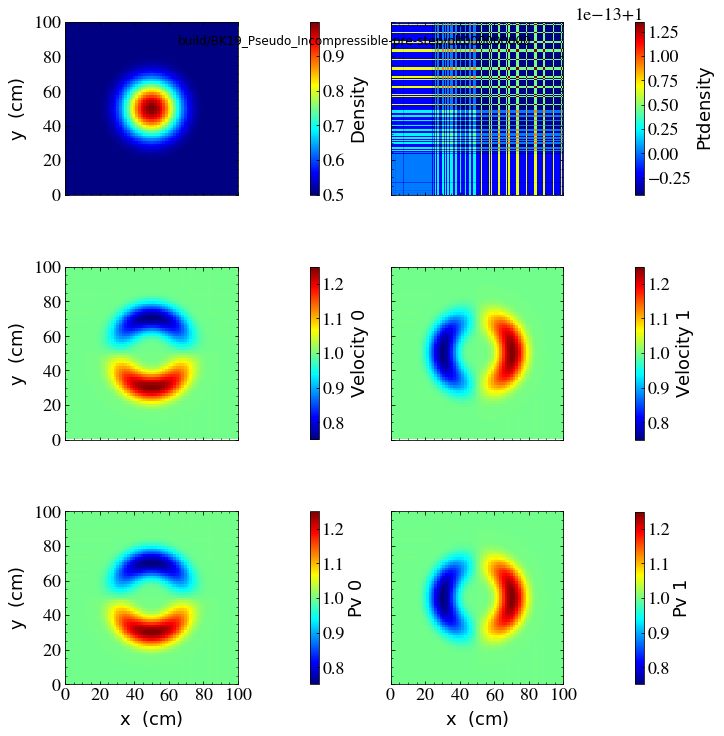

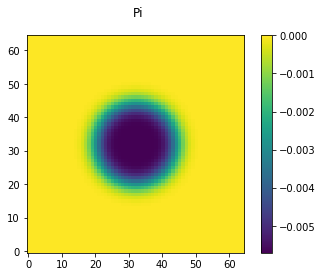

In [6]:
PlotVariables(paths[0])

yt : [INFO     ] 2020-01-16 13:31:59,580 Parameters: current_time              = 0.005650869044323932
yt : [INFO     ] 2020-01-16 13:31:59,582 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:31:59,584 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:31:59,585 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:32:00,378 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:00,380 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:00,387 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:00,392 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:00,400 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:00,444 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:00,460 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

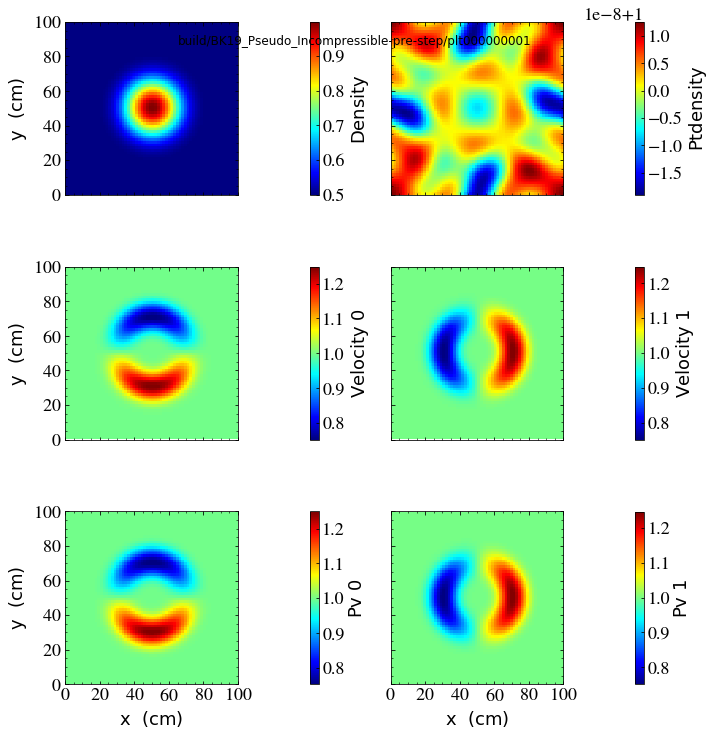

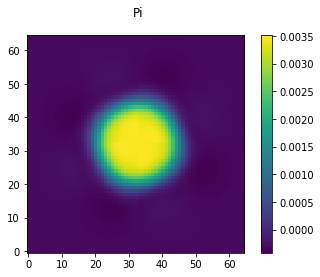

In [7]:
PlotVariables(paths[1])

yt : [INFO     ] 2020-01-16 13:32:12,384 Parameters: current_time              = 0.011300422748576776
yt : [INFO     ] 2020-01-16 13:32:12,388 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:32:12,399 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:32:12,403 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:32:13,074 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:13,075 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:13,082 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:13,087 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:13,102 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:13,139 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:13,152 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

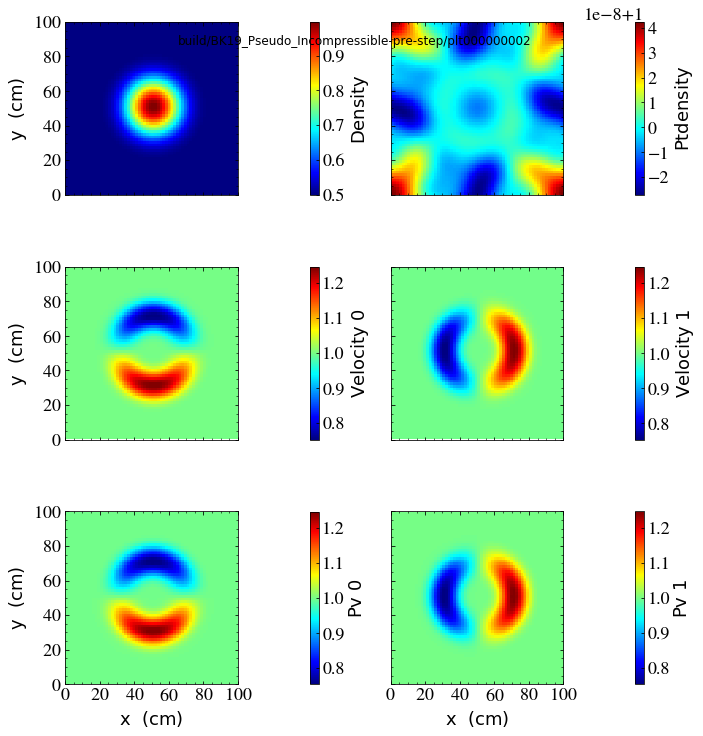

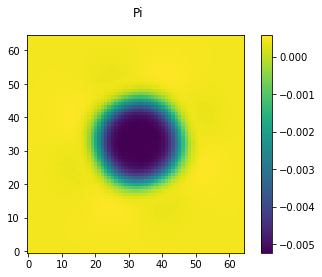

In [8]:
PlotVariables(paths[2])

yt : [INFO     ] 2020-01-16 13:32:39,682 Parameters: current_time              = 0.016954666357818542
yt : [INFO     ] 2020-01-16 13:32:39,683 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:32:39,685 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:32:39,688 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:32:40,317 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:40,320 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:40,331 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:40,340 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:40,349 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:40,376 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:40,402 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

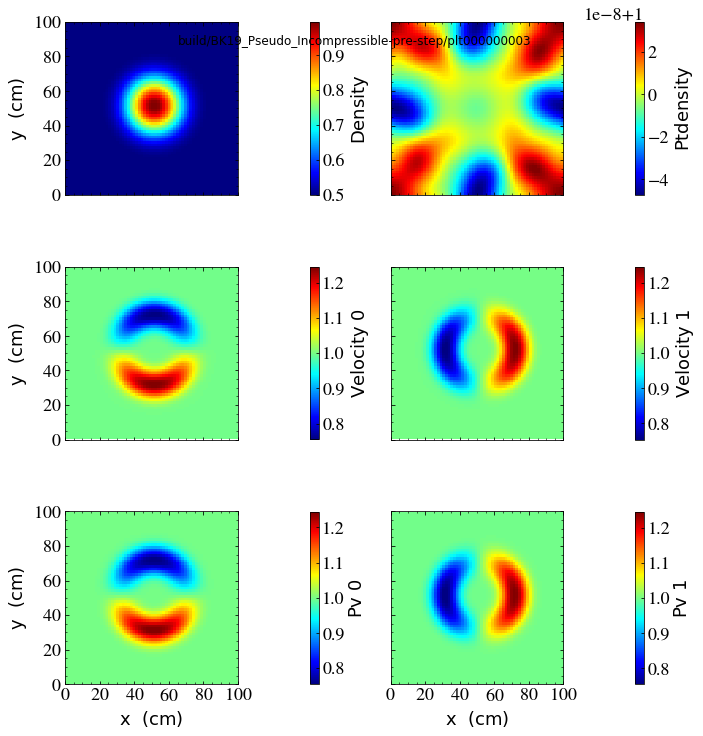

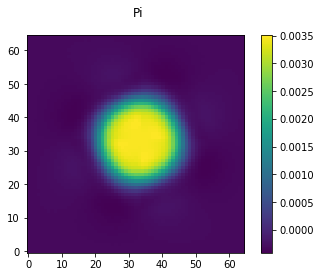

In [9]:
PlotVariables(paths[3])

yt : [INFO     ] 2020-01-16 13:32:51,826 Parameters: current_time              = 0.022613271464306365
yt : [INFO     ] 2020-01-16 13:32:51,830 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:32:51,844 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:32:51,851 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:32:52,604 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:52,605 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:52,611 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:52,612 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:32:52,616 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:52,662 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:32:52,685 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 

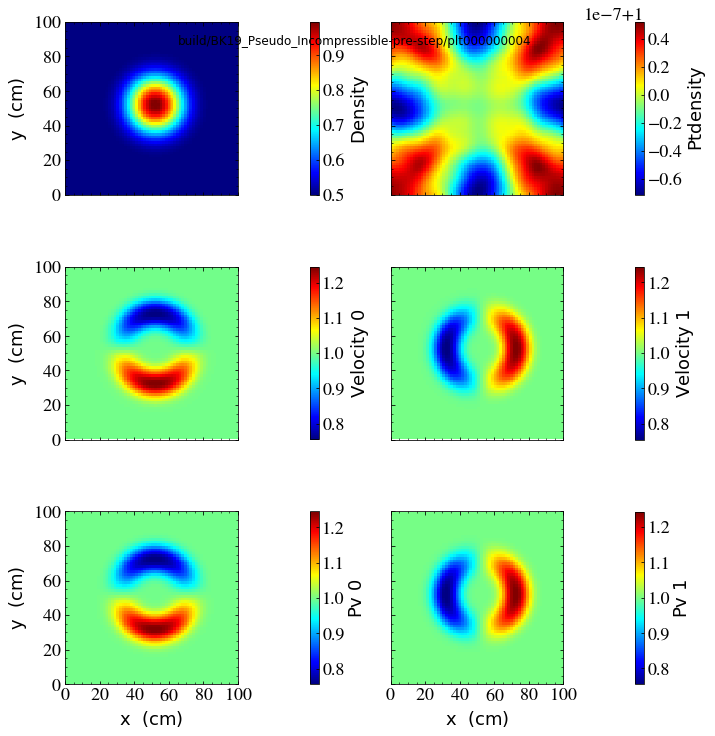

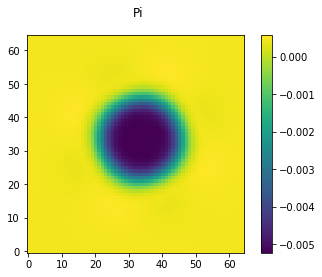

In [10]:
PlotVariables(paths[4])

yt : [INFO     ] 2020-01-16 13:33:01,787 Parameters: current_time              = 0.03961016299238978
yt : [INFO     ] 2020-01-16 13:33:01,788 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2020-01-16 13:33:01,791 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-16 13:33:01,793 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-16 13:33:02,223 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:33:02,224 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:33:02,227 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:33:02,230 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-16 13:33:02,234 Making a fixed resolution buffer of (('boxlib', 'Density')) 800 by 800
yt : [INFO     ] 2020-01-16 13:33:02,249 Making a fixed resolution buffer of (('boxlib', 'PTdensity')) 800 by 800
yt : [INFO     ] 2020-01-16 13:33:02,257 Making a fixed resolution buffer of (('boxlib', 'Velocity_0')) 800 by 800
yt : [INFO     ] 2

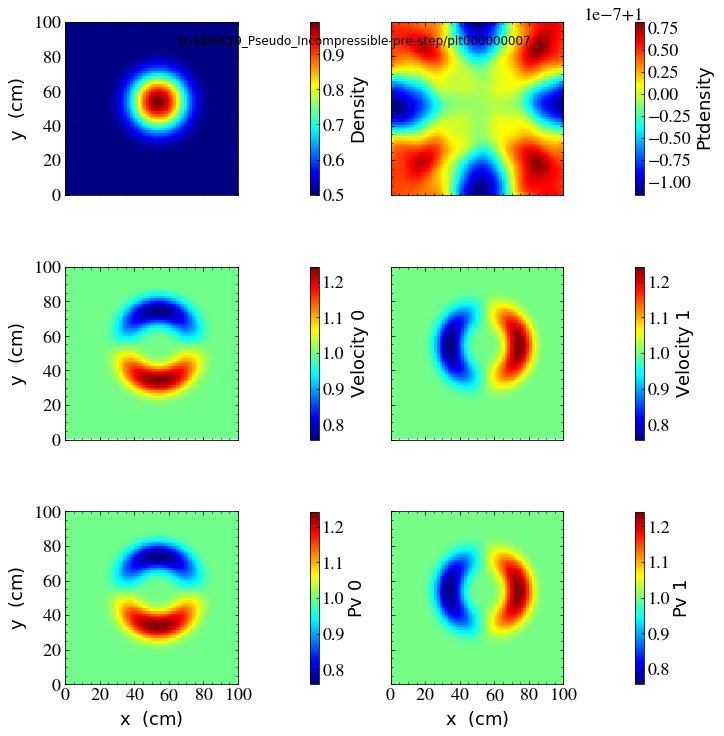

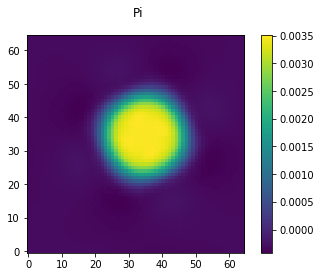

In [11]:
PlotVariables(paths[7])

In [ ]:
ds0 = yt.load(paths[0].replace('plt', 'Pv_plt'))
ds1 = yt.load(paths[3].replace('plt', 'Pv_plt'))
grid0 = ds0.covering_grid(level=0, left_edge=(0.0, 0.0, 0.0), dims=ds.domain_dimensions)
grid1 = ds1.covering_grid(level=0, left_edge=(0.0, 0.0, 0.0), dims=ds.domain_dimensions)
u0 = numpy.array(grid0['Pv'])
u1 = numpy.array(grid1['Pv'])
du = u1 - u0
plt = matplotlib.pyplot.imshow(du[:,:,0].transpose(), interpolation='none', origin='lower')
matplotlib.pyplot.colorbar()

In [ ]:
ds = yt.load(paths[5])
ds.field_list
g = ds.index.grids[0]
pi = np.squeeze(np.array(g["pi"]))

x_nd = np.linspace(g.LeftEdge[0], g.RightEdge[0], g.shape[0]+1)
y_nd = np.linspace(g.LeftEdge[1], g.RightEdge[1], g.shape[1]+1)

a_nd = np.zeros(g.shape[:2]+1)
a_nd[:-1,:-1] = pi[:,:,0]
a_nd[:-1,-1] = pi[:,-1,1]
a_nd[-1,:-1] = pi[-1,:,2]
a_nd[-1,-1] = pi[-1,-1,3]

plt = matplotlib.pyplot.imshow(a_nd.transpose(), interpolation='none', origin='lower')
matplotlib.pyplot.colorbar()